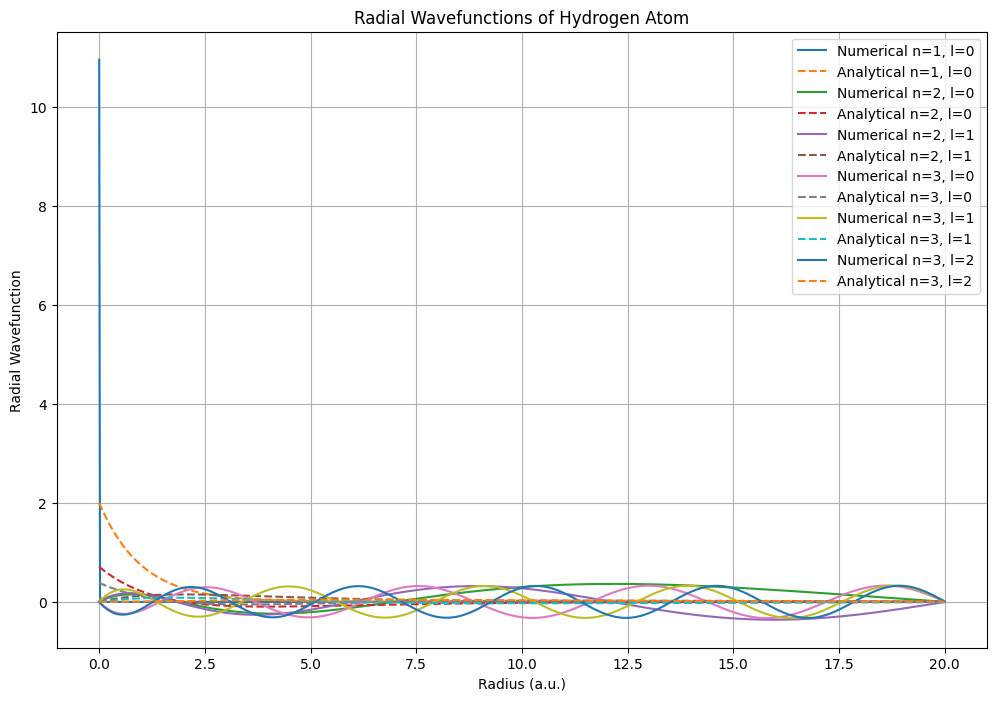

In [5]:
# Numerical solver for Schroedinger equation of hydrogen
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.constants import hbar, m_e, eV
from scipy.special import genlaguerre
from scipy.integrate import simps
from scipy.special import sph_harm
from mpl_toolkits.mplot3d import Axes3D

# Parameters
r_max = 20.0  # Maximum radius (in atomic units)
N = 1000      # Number of radial points
l_max = 3     # Maximum angular momentum quantum number
r = np.linspace(1e-5, r_max, N)  # Radial grid
dr = r[1] - r[0]  # Radial step size
V = -1.0 / r  # Coulomb potential
# Kinetic energy operator (finite difference)
T = -0.5 * (np.diag(-2 * np.ones(N)) +
            np.diag(np.ones(N - 1), 1) +
            np.diag(np.ones(N - 1), -1)) / dr**2
# Hamiltonian matrix
H = T + np.diag(V)
# Solve eigenvalue problem
energies, wavefuncs = eigh(H)
# Convert energies from Joules to eV
# Convert energies from Joules to eV
energies = energies * (hbar**2 / (2 * m_e)) / eV
V
# Normalize wavefunctions
for n in range(len(energies)):
    norm = simps(np.abs(wavefuncs[:, n])**2, r)
    wavefuncs[:, n] /= np.sqrt(norm)
# Analytical solutions for comparison
def R_nl(n, l, r):
    """Radial wavefunction for hydrogen atom."""
    a0 = 1.0  # Bohr radius in atomic units
    rho = 2 * r / (n * a0)
    prefactor = np.sqrt((2 / (n * a0))**3 * np.math.factorial(n - l - 1) /
                        (2 * n * np.math.factorial(n + l)))
    laguerre_poly = genlaguerre(n - l - 1, 2 * l + 1)(rho)
    return prefactor * rho**l * np.exp(-rho / 2) * laguerre_poly
# Plotting
plt.figure(figsize=(12, 8))
for n in range(1, 4):
    for l in range(0, min(n, l_max + 1)):
        idx = n**2 - 1 + l  # Index in the sorted eigenvalues
        plt.plot(r, wavefuncs[:, idx], label=f'Numerical n={n}, l={l}')
        plt.plot(r, R_nl(n, l, r), '--', label=f'Analytical n={n}, l={l}')
plt.title('Radial Wavefunctions of Hydrogen Atom')
plt.xlabel('Radius (a.u.)')
plt.ylabel('Radial Wavefunction')
plt.legend()
plt.grid()
plt.show()

